/tmp/ipykernel_152/978747916.py:10: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CSCS_data_anon.csv')


Unique values in 'CONNECTION_social_time_neighbours_p7d_grouped':
['Less than 1 hour' '1 to 4 hours' 'No time' nan '5 or more hours'
 'Presented but no response']

Value counts in 'CONNECTION_social_time_neighbours_p7d_grouped':
CONNECTION_social_time_neighbours_p7d_grouped
No time                      3687
Less than 1 hour             2905
NaN                          2422
1 to 4 hours                 1534
5 or more hours               837
Presented but no response      46
Name: count, dtype: int64

Accuracy: 0.8482245131729668

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       265
         Low       0.85      1.00      0.92      1481

    accuracy                           0.85      1746
   macro avg       0.42      0.50      0.46      1746
weighted avg       0.72      0.85      0.78      1746


Confusion Matrix:
[[   0  265]
 [   0 1481]]


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


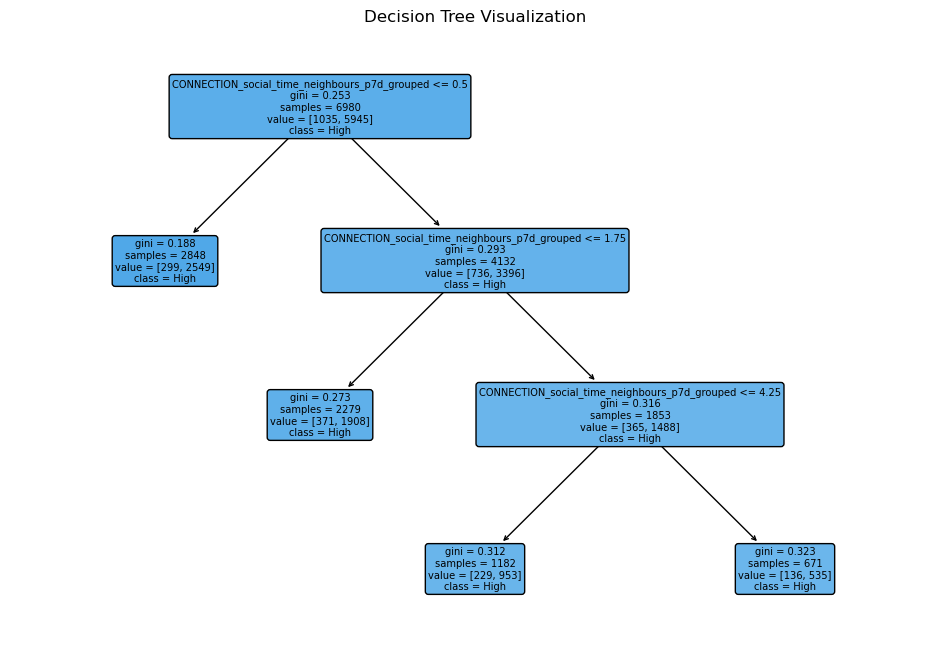

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
data = pd.read_csv('CSCS_data_anon.csv')

# Print unique values in the 'CONNECTION_social_time_neighbours_p7d_grouped' column
print("Unique values in 'CONNECTION_social_time_neighbours_p7d_grouped':")
print(data['CONNECTION_social_time_neighbours_p7d_grouped'].unique())

# Count the occurrences of each value in the 'CONNECTION_social_time_neighbours_p7d_grouped' column
print("\nValue counts in 'CONNECTION_social_time_neighbours_p7d_grouped':")
print(data['CONNECTION_social_time_neighbours_p7d_grouped'].value_counts(dropna=False))

# Data cleaning and encoding
data_cleaned = data[['WELLNESS_life_satisfaction', 'CONNECTION_social_time_neighbours_p7d_grouped']].dropna()

# Encode the categorical variable 'CONNECTION_social_time_neighbours_p7d_grouped'
encoding = {
    'No time': 0,
    'Less than 1 hour': 1,
    '1 to 4 hours': 2.5,
    '5 or more hours': 6
}
data_cleaned['CONNECTION_social_time_neighbours_p7d_grouped'] = data_cleaned['CONNECTION_social_time_neighbours_p7d_grouped'].map(encoding)

# Create a binary target variable: High satisfaction (>8) vs. Low satisfaction (<=8)
data_cleaned['Satisfaction_Level'] = data_cleaned['WELLNESS_life_satisfaction'].apply(lambda x: 'High' if x > 8 else 'Low')

# Define features (X) and target (y)
X = data_cleaned[['CONNECTION_social_time_neighbours_p7d_grouped']]
y = data_cleaned['Satisfaction_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=['CONNECTION_social_time_neighbours_p7d_grouped'], class_names=['Low', 'High'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
